# Import and plot all the analytic computation and simple simulation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from tabulate import tabulate

# import the C++ module
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/System_backend')
import System_backend as backend
import Simulate_System as SimSys

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/super_simple_simulation/')

import Super_Simple_System as SSSys
import Super_Simple_Stochastic_Matrix as SSSMatrix


In [27]:
# define the unit of the system :
R = 50
L = 100
Eb = -10.
kdiff = 5.20142e-05#0.0605704#np.exp(Eb)/2
size = 100
dangling = False

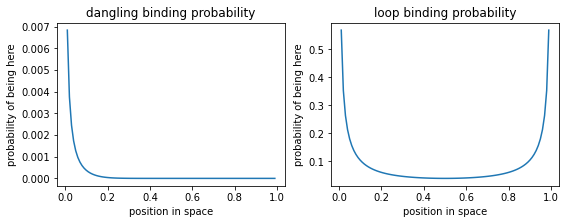

  Pmeet_dangling    Pmeet_loop        kbind        kdiff
----------------  ------------  -----------  -----------
     0.000207352     0.0855245  4.53999e-05  5.20142e-05


In [28]:
# Look at the dangling and loop probability distribution of meeting :
X0,Pmeet_dangling = SSSMatrix.PmeetArray(R,L,size,dangling = True)
X1,Pmeet_loop = SSSMatrix.PmeetArray(R,L,size,dangling = False)
fig,ax = plt.subplots(ncols=2,figsize=(9,3))
for i in range(2):
    ax[i].set_xlabel('position in space')
    ax[i].set_ylabel('probability of being here')
ax[0].set_title('dangling binding probability')
ax[1].set_title('loop binding probability')
ax[0].plot(X0,Pmeet_dangling)
ax[1].plot(X1,Pmeet_loop)
plt.show()
Prob = tabulate([[np.mean(Pmeet_dangling),np.mean(Pmeet_loop),np.exp(Eb),kdiff]],headers=['Pmeet_dangling','Pmeet_loop','kbind','kdiff'])
print(Prob)

In [29]:
# Stochastic matrix method for steady state
X,PMatrix = SSSMatrix.get_ss(R,L,kdiff,Eb,size,dangling)

In [30]:
sssys = SSSys.System(R,L,Eb,kdiff,size,dangling=dangling)
sssys.simulate_eq_distribution(10**5)
print(sssys.move)

[0.0007  0.49965 0.49965]


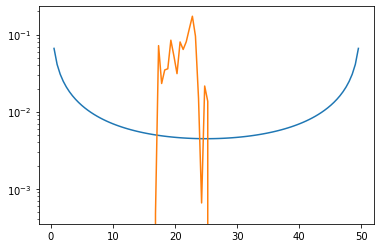

In [31]:
plt.plot(X*R,PMatrix)
plt.plot(sssys.X(),sssys.PR)
plt.yscale('log')

In [8]:
print('the average distance for a dangling bond : d = '+str(sssys.Mean_distance))

the average distance for a dangling bond : d = 26.026008078286146


# Perform a similar simulation using the 3D simulation

[0.0, 15.413515779352942]


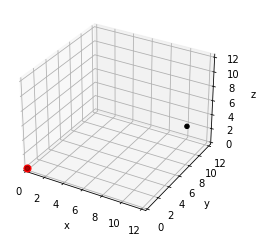

In [20]:
Sys = backend.System(ell_tot=L,rho0=0.,BindingEnergy=Eb,kdiff=kdiff,seed = np.random.randint(0,1000000),Nlinker=2)
Sys.Plot3DSystem()
print([np.linalg.norm(r) for r in Sys.get_r()])

In [21]:
Sim = SimSys.Simulation(step_tot = 10**6,size=100,System = Sys)
Sim.simulate_eq_distribution()
print(Sim.move)

[0.284237 0.431525 0.       0.284238]


In [25]:
print(np.sum(Sim.PR)*)

0.04758048108181466


Text(0.5, 1.0, 'Single linker diffusing')

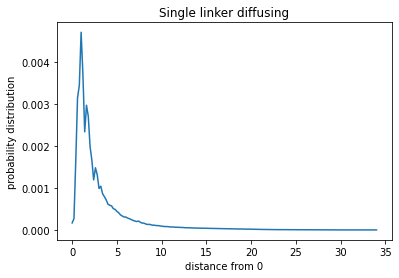

In [24]:
plt.plot(Sim.get_X(Sim.PR.shape[0]),Sim.PR)
#plt.plot(X*R,PMatrix)
plt.xlabel('distance from 0')
plt.ylabel('probability distribution')
plt.title('Single linker diffusing')
#plt.yscale('log')
#plt.savefig('single_linker_diffusion_10E7.svg',transparent=True,bbox_inches='tight')

In [12]:
print(Sim.Mean_distance)

0.06195744709077526


/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/System_backend/System_backend.py:157: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(min(np.append(R,r)),max(np.append(r,R)))
/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/System_backend/System_backend.py:158: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(min(np.append(R,r)),max(np.append(r,R)))
/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/System_backend/System_backend.py:159: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim(min(np.append(R,r)),max(np.append(r,R)))


(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='x', ylabel='y'>)

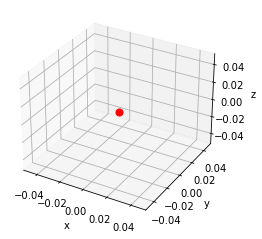

In [13]:
Sys.Plot3DSystem()